# Data Wrangling

- It is the process of cleaning, transforming and organizing data, so it can be used for analysis and visualization.
- It is a necessary step because raw data is often incomplete, inconsistent, and in unstructured format.
- It helps to make data more consistent, accurate and useful for analysis and decision making

In [23]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Assessing Data

In [24]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [26]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Cleaning the data

In [27]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [28]:
# Dropping deck column
df.drop(columns=['deck'], inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [29]:
# fill missing values in age column
# df.fillna(df['age'].mean(), inplace=True)

df['age'].fillna(df['age'].mean(), inplace=True)


In [30]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [31]:
df['embarked'] = df.embarked.fillna(df['embarked'].mode()[0])

In [32]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [33]:
df['embark_town'] = df.embark_town.fillna(df['embark_town'].mode()[0])

In [34]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## Outliers Removal

### Visualization Method

<Axes: xlabel='sex', ylabel='age'>

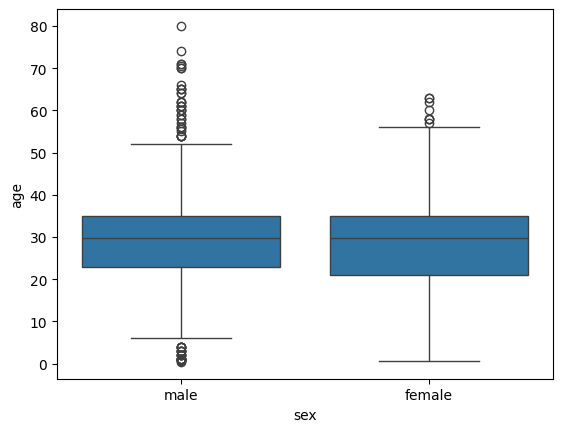

In [36]:
sns.boxplot(data=df, x='sex', y='age')

### IQR Method

In [37]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

print("Q1: ", Q1, "\nQ3: ", Q3, "\nIQR: ", IQR)

Q1:  22.0 
Q3:  35.0 
IQR:  13.0


In [38]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound: ", lower_bound, "\nUpper Bound: ", upper_bound)

Lower Bound:  2.5 
Upper Bound:  54.5


In [39]:
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]
df.shape

(825, 14)

In [40]:
# How many outliers removed from age column
891 - 825

66

In [42]:
# Now remove outliers from fare column

Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

print("Q1: ", Q1, "\nQ3: ", Q3, "\nIQR: ", IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound: ", lower_bound, "\nUpper Bound: ", upper_bound)

df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]
print(df.shape)


Q1:  7.8958 
Q3:  30.0708 
IQR:  22.174999999999997
Lower Bound:  -25.366699999999994 
Upper Bound:  63.333299999999994
(718, 14)


In [43]:
# how many outliers removed from fare column
825- 718

107

<Axes: xlabel='age', ylabel='Count'>

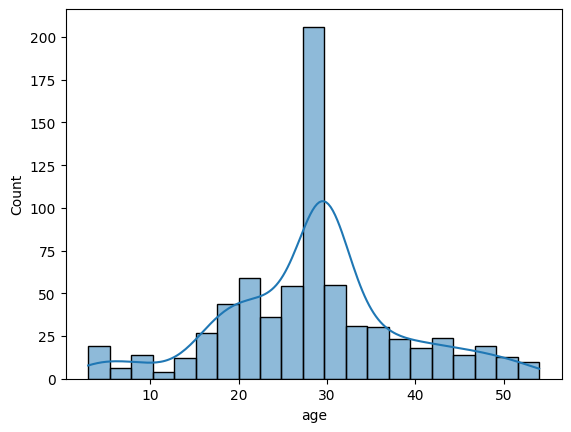

In [44]:
sns.histplot(data=df, x='age', kde=True)

<Axes: xlabel='fare', ylabel='Count'>

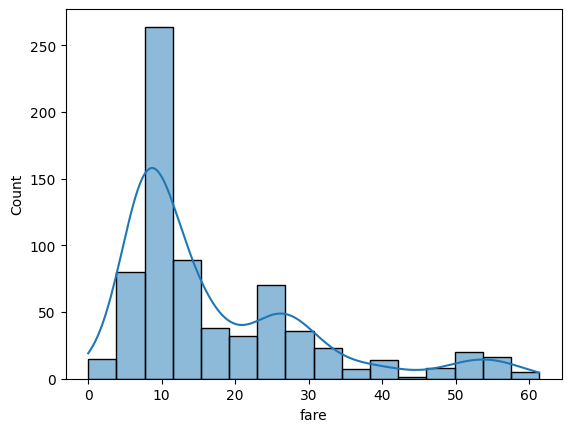

In [45]:
sns.histplot(data=df, x='fare', kde=True)

### Z-score Method

In [47]:
from scipy import stats

In [ ]:
# zscore = np.abs(stats.zscore(df['age']))
# threshold = 3
# df = df[(zscore < threshold).all(axis=1)]

## Finding and Dropping Duplicates

In [48]:
print("Shape: ", df.shape)

Shape:  (718, 14)


In [49]:
df.duplicated().sum()

103

In [51]:
df_duplicates = df[df.duplicated() == True]
df_duplicates

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.000000,0,0,7.8958,S,Third,man,True,Southampton,no,True
877,0,3,male,19.000000,0,0,7.8958,S,Third,man,True,Southampton,no,True
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
884,0,3,male,25.000000,0,0,7.0500,S,Third,man,True,Southampton,no,True


In [52]:
# dropping duplicates
df.drop_duplicates(inplace=True)
print("Shape: ", df.shape)


Shape:  (615, 14)


In [53]:
# How many duplicates removed
718- 615

103